scikit-learn的线性回归模型 利用pandas处理数据

内容概要
如何使用pandas读入数据
如何使用seaborn进行数据的可视化
scikit-learn的线性回归模型和使用方法
线性回归模型的评估测度
特征选择的方法
作为有监督学习，分类问题是预测类别结果，而回归问题是预测一个连续的结果。

# 利用pandas读取数据

In [1]:
import pandas as pd

In [3]:
# read csv file directly from a URL and save the results
# data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data=pd.read_csv('./Data/Advertising.csv',index_col=0)

In [4]:
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [5]:
data.shape

(200, 4)

特征：

TV：对于一个给定市场中单一产品，用于电视上的广告费用（以千为单位）
Radio：在广播媒体上投资的广告费用
Newspaper：用于报纸媒体的广告费用
响应：

Sales：对应产品的销量
在这个案例中，我们通过不同的广告投入，预测产品销量。因为响应变量是一个连续的值，所以这个问题是一个回归问题。数据集一共有200个观测值，每一组观测对应一个市场的情况。

In [7]:
import seaborn as sns
%matplotlib inline

/home/whg/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


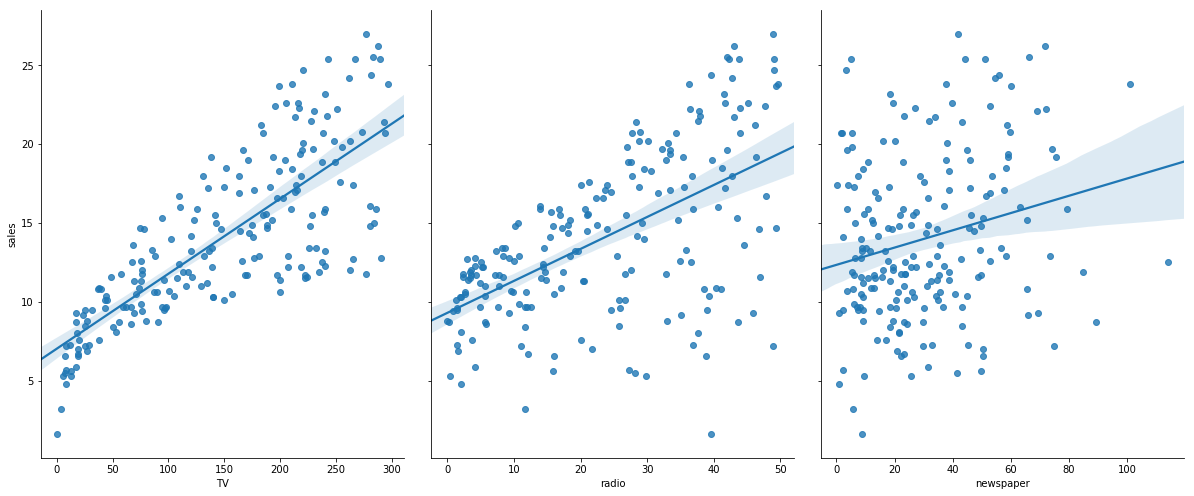

In [9]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data,x_vars=['TV','radio','newspaper'],y_vars=['sales'],size=7,aspect=0.8,kind='reg') 

# 线性回归模型

## 使用pandas来构建X和y

In [14]:
# create a python list of feature names
feature_cols = ['TV', 'radio', 'newspaper']
X = data[feature_cols]
X.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [16]:
print(type(X)),X.shape

<class 'pandas.core.frame.DataFrame'>


(None, (200, 3))

In [18]:
y=data['sales']
# y=data.sales
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

## 构造训练集和测试集

In [21]:
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [23]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print( X_test.shape)
print(y_test.shape)

(150, 3)
(150,)
(50, 3)
(50,)


## Scikit-learn的线性回归

In [24]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [26]:
print(linreg.intercept_)
print(linreg.coef_)

2.8769666223179318
[0.04656457 0.17915812 0.00345046]


In [27]:
# pair the feature names with the coefficients
zip(feature_cols, linreg.coef_)

如何解释各个特征对应的系数的意义？

对于给定了Radio和Newspaper的广告投入，如果在TV广告上每多投入1个单位，对应销量将增加0.0466个单位
更明确一点，加入其它两个媒体投入固定，在TV广告上没增加1000美元（因为单位是1000美元），销量将增加46.6（因为单位是1000

## 预测

In [28]:
y_pred = linreg.predict(X_test)

In [29]:
type(y_pred)

numpy.ndarray

# 回归问题的评价测度

对于分类问题，评价测度是准确率，但这种方法不适用于回归问题。我们使用针对连续数值的评价测度(evaluation metrics)。

下面介绍三种常用的针对回归问题的评价测度

In [30]:
# define true and predicted response values
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

(1)平均绝对误差(Mean Absolute Error, MAE)

(2)均方误差(Mean Squared Error, MSE)

(3)均方根误差(Root Mean Squared Error, RMSE)

In [31]:
from sklearn import metrics
import numpy as np
# calculate MAE by hand
print("MAE by hand:",(10 + 0 + 20 + 10)/4)

# calculate MAE using scikit-learn
print("MAE:",metrics.mean_absolute_error(true, pred))

# calculate MSE by hand
print("MSE by hand:",(10**2 + 0**2 + 20**2 + 10**2)/4)

# calculate MSE using scikit-learn
print("MSE:",metrics.mean_squared_error(true, pred))


# calculate RMSE by hand
print("RMSE by hand:",np.sqrt((10**2 + 0**2 + 20**2 + 10**2)/4))

# calculate RMSE using scikit-learn
print("RMSE:",np.sqrt(metrics.mean_squared_error(true, pred)))

MAE by hand: 10.0
MAE: 10.0
MSE by hand: 150.0
MSE: 150.0
RMSE by hand: 12.24744871391589
RMSE: 12.24744871391589


计算Sales预测的RMSE

In [32]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.4046514230328955


In [36]:
feature_cols = ['TV', 'radio']

X = data[feature_cols]
y = data.sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.3879034699382888


我们将Newspaper这个特征移除之后，得到RMSE变小了，说明Newspaper特征不适合作为预测销量的特征，于是，我们得到了新的模型。我们还可以通过不同的特征组合得到新的模型，看看最终的误差是如何的
